In [1]:
import pandas as pd
from pandas import json_normalize

import requests 
import json
import os
from dotenv import load_dotenv #conda install -c conda-forge python-dotenv

import time

import sys
sys.path.append("../")

from getpass import getpass

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [4]:
spotify = pd.read_csv("../data/spotify_songs.csv")

In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [6]:
'''
track_id                     Song unique ID
track_name                   Song Name
track_artist                 Song Artist
track_popularity             Song Popularity (0-100) where higher is better
track_album_id               Album unique ID
track_album_name             Song album name
track_album_release_date     Date when album released
playlist_name                Name of playlist
playlist_id                  Playlist ID
playlist_genre               Playlist genre
playlist_subgenre            Playlist subgenre
danceability (0-1)           Danceability describes how suitable a track is for dancing based on a 
                             combination of musical elements including tempo, rhythm stability, beat strength,  
                             and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
energy (0-1)                 Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.  
                             Typically, energetic tracks feel fast, loud, and noisy. 
                             For example, death metal has high energy, while a Bach prelude scores low on the scale. 
                             Perceptual features contributing to this attribute include dynamic range, perceived loudness, 
                             timbre, onset rate, and general entropy.
key                          The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation
                             0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
loudness                     The overall loudness of a track in decibels (dB). 
                             Loudness values are averaged across the entire track and are useful for comparing relative loudness
                             of tracks. Loudness is the quality of a sound that is the primary psychological correlate 
                             of physical strength (amplitude). Values typical range between -60 and 0 db.
mode                         Mode indicates the modality (major or minor) of a track, the type of scale 
                             from which its melodic content is derived. Major is represented by 1 and minor is 0.
speechiness                  Speechiness detects the presence of spoken words in a track. 
                             The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), 
                             the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably 
                             made entirely of spoken words. Values between 0.33 and 0.66 describe tracks 
                             that may contain both music and speech, either in sections or layered, 
                             including such cases as rap music. Values below 0.33 most likely represent music and 
                             other non-speech-like tracks.
acousticness                 A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 
                             1.0 represents high confidence the track is acoustic.
instrumentalness             Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental 
                             in this context. Rap or spoken word tracks are clearly "vocal". 
                             The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal
                             content. Values above 0.5 are intended to represent instrumental tracks, 
                             but confidence is higher as the value approaches 1.0.
liveness                     Detects the presence of an audience in the recording. 
                             Higher liveness values represent an increased probability that the track was performed live. 
                             A value above 0.8 provides strong likelihood that the track is live.
valence (0-1)                A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 
                             Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), 
                             while tracks with low valence sound more negative (e.g. sad, depressed, angry).
tempo                        The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, 
                             tempo is the speed or pace of a given piece 
                             and derives directly from the average beat duration.
duration_ms                  Duration of song in milliseconds
'''

'\ntrack_id                     Song unique ID\ntrack_name                   Song Name\ntrack_artist                 Song Artist\ntrack_popularity             Song Popularity (0-100) where higher is better\ntrack_album_id               Album unique ID\ntrack_album_name             Song album name\ntrack_album_release_date     Date when album released\nplaylist_name                Name of playlist\nplaylist_id                  Playlist ID\nplaylist_genre               Playlist genre\nplaylist_subgenre            Playlist subgenre\ndanceability (0-1)           Danceability describes how suitable a track is for dancing based on a \n                             combination of musical elements including tempo, rhythm stability, beat strength,  \n                             and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.\nenergy (0-1)                 Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.  \n   

In [7]:
set(spotify["playlist_name"])

{'"Permanent Wave"',
 '10er Playlist',
 '1987-1997 OLD SKOOL JAMZ',
 "2000's hard rock",
 '2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016 - 2017 - 2018 - 2019 - 2020 TOP HITS',
 '2011-2014 House',
 '2015 songs',
 '2019 in Indie Poptimism',
 '2020 Hits & 2019  Hits – Top Global Tracks 🔥🔥🔥',
 '3rd Coast Classics',
 "70's Classic Rock",
 '70s Hard Rock',
 '70s Pop & Rock Hits and Deep Tracks',
 "80's Freestyle/Disco Dance Party (Set Crossfade to 4-Seconds)",
 "80's Songs | Top 💯 80s Music Hits",
 '80s / Classic Rock',
 '80s Pop & Rock Hits and Album Tracks',
 '80s-90s R&B / New Jack Swing / Funk / Dance / Soul',
 "90's Gangster Rap",
 "90's Hip Hop Ultimate Collection",
 "90's NEW JACK SWING",
 "90's Southern Hip Hop",
 '90s Dance Hits',
 '90s Gangsta Rap / Top Hip-hop Classics',
 '90s Hiphop / Gangsta Rap',
 '90s R&B - The BET Planet Groove/Midnight Love Mix',
 '90s-2000s Southern Hip Hop / Crunk',
 '90s/00s Hip Hop & RnB',
 '< DARK TRAP >',
 '@deniceemoberg EDM - POP REMIXES',
 'A Loose

In [8]:
spotify[spotify["track_popularity"]==98]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
687,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960
711,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486
716,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
1300,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486
1301,21jGcNKet2qwijlDFuPiPb,Circles,Post Malone,98,4g1ZRSobMefqF6nelkgibi,Hollywood's Bleeding,2019-09-06,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280
1605,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
4713,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,indie poptimism🕺🏻,6MQeEHHDs6HQkN5Dlj3oKo,pop,...,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653
9018,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,GTA San Andreas Radio Los Santos,6m0BqpJfSP2m5xCOFjDRHw,rap,...,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653
11113,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Trap 2020 🔥,37DFLy7lqF3qiR99Ss2ZGR,rap,...,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960


In [9]:
#remove duplicates of songs
spotify = spotify.drop_duplicates(subset=["track_name","track_artist"], keep='first')

In [10]:
spotify[spotify["track_popularity"]==98]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
687,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960
711,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,11,-7.209,1,0.0546,0.83700,0.000000,0.0822,0.575,91.019,189486
716,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
5508,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,10,-6.687,0,0.0559,0.10400,0.000000,0.7900,0.642,116.971,196653


In [11]:
# adding a column for the release year of tracks album

In [12]:
pattern_year="(^\d{4})"

In [13]:
spotify["track_album_release_year"]= spotify["track_album_release_date"].str.extract(pattern_year)

In [14]:
spotify[["track_name","track_artist","track_album_release_date","track_album_release_year"]].sample(10)

,track_name,track_artist,track_album_release_date,track_album_release_year
13326,Still Of The Night - 2007 Remastered Version,Whitesnake,1987-04-04,1987
6027,Wanna Be A Baller,Lil' Troy,1998,1998
20900,22,Gui Brazil,2018-05-25,2018
7573,Dark Angel (feat. Kevin Gates),Trae Tha Truth,2013-11-25,2013
27615,Take Off,Erlandsson,2018-04-20,2018
6422,Everybody Dies,Logic,2018-09-28,2018
8030,Baknaffek,Das EFX,1993-11-16,1993
623,Dance Monkey,Skylike,2019-09-06,2019
28729,Tiger,R3HAB,2015-06-12,2015
29663,Lucky Star,Adaptiv,2019-12-06,2019


In [15]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26230 entries, 0 to 32832
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  26230 non-null  object 
 1   track_name                26229 non-null  object 
 2   track_artist              26229 non-null  object 
 3   track_popularity          26230 non-null  int64  
 4   track_album_id            26230 non-null  object 
 5   track_album_name          26229 non-null  object 
 6   track_album_release_date  26230 non-null  object 
 7   playlist_name             26230 non-null  object 
 8   playlist_id               26230 non-null  object 
 9   playlist_genre            26230 non-null  object 
 10  playlist_subgenre         26230 non-null  object 
 11  danceability              26230 non-null  float64
 12  energy                    26230 non-null  float64
 13  key                       26230 non-null  int64  
 14  loudness   

In [16]:
# adding a column for the release decade of tracks album

In [17]:
def decade(year):
    if year<1969:
        return '60s'
    elif year<1979:
        return '70s'
    elif year<1989:
        return '80s'
    elif year<1999:
        return '90s'
    elif year<2009:
        return '2000s'
    elif year<=2020:
        return '2010s'

In [18]:
spotify["track_album_release_decade"] = pd.to_numeric(spotify["track_album_release_year"]).apply(decade)

In [19]:
spotify[["track_name","track_artist","track_album_release_date","track_album_release_year","track_album_release_decade"]].sample(10)

,track_name,track_artist,track_album_release_date,track_album_release_year,track_album_release_decade
3358,TBC,Ragazzi,2001-01-01,2001,2000s
32646,Metasphere,KLIMENT,2018-05-10,2018,2010s
22482,Running To You,Deitrick Haddon,2008-09-02,2008,2000s
25181,Darkside,Myron,2003-09-01,2003,2000s
9083,So You Want to Be a Gangster,Too $hort,1992-07-13,1992,90s
4760,On the Back of Your Neck,Cienfue,2020-01-03,2020,2010s
18236,Dembow,Danny Ocean,2017-12-08,2017,2010s
5165,Emotional,Flux Pavilion,2015-09-18,2015,2010s
10953,Wild Thoughts - Medasin Dance Remix,DJ Khaled,2017-07-21,2017,2010s
18288,Perro Fiel (feat. Nicky Jam),Shakira,2017-05-26,2017,2010s


In [20]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26230 entries, 0 to 32832
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   track_id                    26230 non-null  object 
 1   track_name                  26229 non-null  object 
 2   track_artist                26229 non-null  object 
 3   track_popularity            26230 non-null  int64  
 4   track_album_id              26230 non-null  object 
 5   track_album_name            26229 non-null  object 
 6   track_album_release_date    26230 non-null  object 
 7   playlist_name               26230 non-null  object 
 8   playlist_id                 26230 non-null  object 
 9   playlist_genre              26230 non-null  object 
 10  playlist_subgenre           26230 non-null  object 
 11  danceability                26230 non-null  float64
 12  energy                      26230 non-null  float64
 13  key                         26230 no

In [21]:
#creating a dataframe for different decades
spotify60 = spotify[pd.to_numeric(spotify["track_album_release_year"])<1970]
spotify70 = spotify[(pd.to_numeric(spotify["track_album_release_year"])>=1970) & (pd.to_numeric(spotify["track_album_release_year"])<1980)]
spotify80 = spotify[(pd.to_numeric(spotify["track_album_release_year"])>=1980) & (pd.to_numeric(spotify["track_album_release_year"])<1990)]
spotify90 = spotify[(pd.to_numeric(spotify["track_album_release_year"])>=1990) & (pd.to_numeric(spotify["track_album_release_year"])<2000)]
spotify00 = spotify[(pd.to_numeric(spotify["track_album_release_year"])>=2000) & (pd.to_numeric(spotify["track_album_release_year"])<2010)]
spotify10 = spotify[(pd.to_numeric(spotify["track_album_release_year"])>=2010) & (pd.to_numeric(spotify["track_album_release_year"])<=2020)]

In [22]:
len(spotify60) # it would be better to add more songs to the dataframe

122

In [23]:
len(spotify70)

666

In [24]:
len(spotify80)

931

In [25]:
len(spotify90)

1807

In [26]:
len(spotify00)

3331

In [27]:
len(spotify10)

19373

In [28]:
def most_popular(df,n):
    '''
    input: dataframe of songs from same decade, int n
    output: dataframe with the 'n' most popular songs from that decade
    '''
    best_df= df.sort_values("track_popularity", ascending=False) #sorting by popularity
    best_df = best_df.reset_index(drop=True) #rearranging the index
    best_df = best_df.truncate(before=0,after=n) #keeping firts n sogns
    return best_df

In [29]:
best_spotify10 = most_popular(spotify10,100)

In [30]:
best_spotify10

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,track_album_release_decade
0,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,0,0.0559,0.10400,0.000000,0.7900,0.6420,116.971,196653,2019,2010s
1,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,189486,2019,2010s
2,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.0629,0.00147,0.000209,0.0938,0.3450,171.017,201573,2019,2010s
3,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,200960,2019,2010s
4,4TnjEaWOeW0eKTKIEvJyCa,Falling,Trevor Daniel,97,1Czfd5tEby3DbdYNdqzrCa,Falling,2018-10-05,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,159382,2018,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0JP9xo3adEtGSdUEISiszL,Moonlight,XXXTENTACION,86,2Ti79nwTsont5ZHfdxIzAm,?,2018-03-16,Hip pop,1Sc7bobknESH7SXQcnmoX5,r&b,...,0,0.0804,0.55600,0.004040,0.1020,0.7110,128.009,135090,2018,2010s
97,0qaWEvPkts34WF68r8Dzx9,Turn Me On (feat. Vula),Riton,86,7mtnp7B5yFt3D3PAznGzc8,Turn Me On (feat. Vula),2019-09-13,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,1,0.0396,0.01490,0.000583,0.0862,0.5170,124.052,208474,2019,2010s
98,4ZLzoOkj0MPWrTLvooIuaa,Get You The Moon (feat. Snøw),Kina,86,5LZSpPoBVBsh6kRSEKfPQ8,Get You The Moon (feat. Snøw),2018-10-08,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,0,0.1880,0.72000,0.000000,0.1440,0.0895,118.917,179080,2018,2010s
99,4R8BJggjosTswLxtkw8V7P,No Me Conoce - Remix,Jhay Cortez,86,1V9QpD8kjA2iHCElhFGvlo,Famouz,2019-05-24,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0,0.0741,0.14500,0.000000,0.0935,0.5800,91.973,309120,2019,2010s


In [31]:
# how to decide the size of spotify_best? (N more populare song/ songs with popularity > P)

In [45]:
def popularity(df,year):
    '''
    input: dataframe df with songs from decade 'year'
    creates an histogram displayng track_popularity of the songs in dataframe df
    '''
    popularity=sns.histplot(df, x="track_popularity", bins=30)
    plt.xlabel("Popularity")
    if year=='00':
        year==2000
    elif year=='10':
        year==2010
    plt.title(f"Popularity of songs from {year}'s'")
    popularity.figure.savefig(f"../images/popularity{year}.jpg", dpi=1000)
    plt.clf()
    return popularity

In [46]:
popularity(spotify10,10);

<Figure size 1200x600 with 0 Axes>

In [47]:
def popularity2(df,year):
    '''
    input: dataframe df with songs from decade 'year'
    creates a bar plot displayng number of songs for each track_popularity value, sorted by year
    '''
    popularity= sns.countplot(data=df[df["track_popularity"]>75], y="track_popularity", order=[i for i in range(75,101)], palette="husl")
    plt.xlabel("Popularity")
    if year=='00':
        year==2000
    elif year=='10':
        year==2010
    plt.title(f"Popularity of songs from {year}'s'")
    popularity.figure.savefig(f"../images/popularity{year}_2.jpg", dpi=1000)
    plt.clf()
    return popularity

In [48]:
popularity10 = popularity2(spotify10,10)

<Figure size 1200x600 with 0 Axes>

In [49]:
def most_popular_2(df,p):
    '''
    input: dataframe of songs from same decade, int n
    output: dataframe with songs from that decade with track_popularity >= p
    '''
    best_df = df[df["track_popularity"]>=p] #keeping only the songs with track_popularity >= p
    best_df= best_df.sort_values("track_popularity", ascending=False) #sorting by popularity
    best_df = best_df.reset_index(drop=True) #rearranging the index
    return best_df

In [50]:
best_spotify10= most_popular_2(spotify10,89)

In [51]:
len(best_spotify10)

54

In [52]:
best_spotify10

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,track_album_release_decade
0,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.0629,0.00147,0.000209,0.0938,0.3450,171.017,201573,2019,2010s
1,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,189486,2019,2010s
2,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,200960,2019,2010s
3,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,0,0.0559,0.10400,0.000000,0.7900,0.6420,116.971,196653,2019,2010s
4,6WrI0LAC5M1Rw2MnX2ZvEg,Don't Start Now,Dua Lipa,97,0ix3XtPV1LwmZADsprKxcp,Don't Start Now,2019-10-31,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,0,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,183290,2019,2010s
5,4TnjEaWOeW0eKTKIEvJyCa,Falling,Trevor Daniel,97,1Czfd5tEby3DbdYNdqzrCa,Falling,2018-10-05,Electropop,2Z5cPJ6Z4EVZAfF08amjvL,pop,...,0,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,159382,2018,2010s
6,3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted,Billie Eilish,97,4i3rAwPw7Ln2YrKDusaWyT,everything i wanted,2019-11-13,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,245426,2019,2010s
7,6cy3ki60hLwimwIje7tALf,RITMO (Bad Boys For Life),The Black Eyed Peas,96,6EobpC5SDFy5DF50dWNVGF,RITMO (Bad Boys For Life),2019-10-12,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,0,0.0657,0.03340,0.000840,0.2370,0.6670,104.994,221714,2019,2010s
8,41L3O37CECZt3N7ziG2z7l,Yummy,Justin Bieber,95,1SN6N3fNkZk5oXQ9X46QZ3,Yummy,2020-01-03,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,0,0.1060,0.40400,0.000000,0.1210,0.4950,145.841,210427,2020,2010s
9,2Fxmhks0bxGSBdJ92vM42m,bad guy,Billie Eilish,95,0S0KGZnfBGSIssfF54WSJh,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,Pop Warmup 130 BPM,37i9dQZF1DX3PIAZMcbo2T,pop,...,1,0.3750,0.32800,0.130000,0.1000,0.5620,135.128,194088,2019,2010s


In [53]:
best_spotify10_2 = most_popular_2(spotify10,88)

In [54]:
len(best_spotify10_2)

74

In [55]:
best_spotify10_2

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,track_album_release_decade
0,2b8fOow8UzyDFAE27YhOZM,Memories,Maroon 5,98,3nR9B40hYLKLcR0Eph3Goc,Memories,2019-09-20,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.0546,0.83700,0.000000,0.0822,0.5750,91.019,189486,2019,2010s
1,7k4t7uLgtOxPwTpFmtJNTY,Tusa,KAROL G,98,7mKevNHhVnZER3BLgI8O4F,Tusa,2019-11-07,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.2980,0.29500,0.000134,0.0574,0.5740,101.085,200960,2019,2010s
2,0nbXyq5TXYPCO7pr3N8S4I,The Box,Roddy Ricch,98,52u4anZbHd6UInnmHRFzba,Please Excuse Me For Being Antisocial,2019-12-06,RapCaviar,37i9dQZF1DX0XUsuxWHRQd,rap,...,0,0.0559,0.10400,0.000000,0.7900,0.6420,116.971,196653,2019,2010s
3,0sf12qNH5qcw8qpgymFOqD,Blinding Lights,The Weeknd,98,2ZfHkwHuoAZrlz7RMj0PDz,Blinding Lights,2019-11-29,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.0629,0.00147,0.000209,0.0938,0.3450,171.017,201573,2019,2010s
4,3ZCTVFBt2Brf31RLEnCkWJ,everything i wanted,Billie Eilish,97,4i3rAwPw7Ln2YrKDusaWyT,everything i wanted,2019-11-13,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,0,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,245426,2019,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,7BlBVFwvbWvcwNcUarQmjk,"Yo x Ti, Tu x Mi",ROSALÍA,88,3844bY26oeSkqd06th4EYp,"Yo x Ti, Tu x Mi",2019-08-15,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,1,0.2250,0.46200,0.000868,0.1430,0.5790,91.952,201040,2019,2010s
70,6osaMSJh9NguagEDQcZaKx,Loco Contigo (feat. J. Balvin & Tyga),DJ Snake,88,2MFS6WG6jnPAgvJpV3PehR,Carte Blanche,2019-07-25,Pop - Pop UK - 2019 - Canadian Pop - 2019 - Pop,46Cl6dmeiylK6TRGXr7hHe,pop,...,1,0.2180,0.27800,0.000001,0.1020,0.3710,192.091,185195,2019,2010s
71,2rc7BkzO8qepMFAxHtOrXc,Blanco,J Balvin,88,5mcUbpuVL0i5q4cECQ6cV4,Blanco,2019-11-15,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,0,0.1260,0.02530,0.006300,0.0872,0.5930,100.013,145800,2019,2010s
72,59s0s39NFWScuHDbHytI14,Indeciso,Reik,88,4qecT0ZJrf35thz2WaEm6P,Indeciso,2019-08-23,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,pop,...,1,0.0453,0.18200,0.000000,0.1100,0.8960,94.949,217253,2019,2010s


In [56]:
def most_popular_3(df,n_min):
    '''
    input: dataframe of songs from same decade, int n
    output: dataframe with at least n_min songs from that decade with highest 'track_popularity'
    '''
    best_df= df.sort_values("track_popularity", ascending=False) #sorting by popularity
    best_df = best_df.reset_index(drop=True) #rearranging the index
    p = best_df.iloc[n_min-1]["track_popularity"]
    best_df = df[df["track_popularity"]>=p] #keeping only the songs with track_popularity >= p
    return best_df

In [57]:
best_spotify10 = most_popular_3(spotify10,100)

In [58]:
len(best_spotify10)

122

In [59]:
best_spotify10

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_year,track_album_release_decade
41,6oJ6le65B3SEqPwMRNXWjY,Higher Love,Kygo,87,4wquJImu8RtyEuDtIAsfcE,Higher Love,2019-06-28,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0324,0.0154,0.000006,0.1010,0.4040,103.952,228267,2019,2010s
139,6cy3ki60hLwimwIje7tALf,RITMO (Bad Boys For Life),The Black Eyed Peas,96,6EobpC5SDFy5DF50dWNVGF,RITMO (Bad Boys For Life),2019-10-12,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,0,0.0657,0.0334,0.000840,0.2370,0.6670,104.994,221714,2019,2010s
141,0qaWEvPkts34WF68r8Dzx9,Turn Me On (feat. Vula),Riton,86,7mtnp7B5yFt3D3PAznGzc8,Turn Me On (feat. Vula),2019-09-13,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,1,0.0396,0.0149,0.000583,0.0862,0.5170,124.052,208474,2019,2010s
179,7CHi4DtfK4heMlQaudCuHK,Lose Control,MEDUZA,91,1qSOaTvsCOyFJya3v1UzkP,Lose Control,2019-10-11,Dance Room,37i9dQZF1DX2ENAPP1Tyed,pop,...,0,0.0415,0.1290,0.000000,0.1400,0.5290,123.935,168387,2019,2010s
335,25sgk305KZfyuqVBQIahim,Sweet but Psycho,Ava Max,87,7CdLU3GgPy1PH5FVsrPlyA,Sweet but Psycho,2018-08-17,Pop Warmup 130 BPM,37i9dQZF1DX3PIAZMcbo2T,pop,...,1,0.0476,0.0691,0.000000,0.1660,0.6280,133.002,187436,2018,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22047,2VxeLyX666F8uXCJ0dZF8B,Shallow,Lady Gaga,88,4sLtOBOzn4s3GDUv3c5oJD,A Star Is Born Soundtrack,2018-10-05,Urban contemporary,1ZlL3IQS8eB0s0RMxz02yD,r&b,...,1,0.0308,0.3710,0.000000,0.2310,0.3230,95.799,215733,2018,2010s
22142,0u2P5u6lvoDfwTYjAADbn4,lovely (with Khalid),Billie Eilish,89,2sBB17RXTamvj7Ncps15AK,lovely (with Khalid),2018-04-19,PROJECT: Contemporary,6HaCi9bqaiuSZEDfCEmwyo,r&b,...,0,0.0333,0.9340,0.000000,0.0950,0.1200,115.284,200186,2018,2010s
22360,2qxmye6gAegTMjLKEBoR3d,Let Me Down Slowly,Alec Benjamin,86,6jKZplJpy21R5lHaYHHjmZ,Narrated For You,2018-11-16,urban contemporary,4WiB26kw0INKwbzfb5M6Tv,r&b,...,0,0.0318,0.7400,0.000000,0.1240,0.4830,150.073,169354,2018,2010s
23264,0JP9xo3adEtGSdUEISiszL,Moonlight,XXXTENTACION,86,2Ti79nwTsont5ZHfdxIzAm,?,2018-03-16,Hip pop,1Sc7bobknESH7SXQcnmoX5,r&b,...,0,0.0804,0.5560,0.004040,0.1020,0.7110,128.009,135090,2018,2010s


In [60]:
#DECADE: 80S

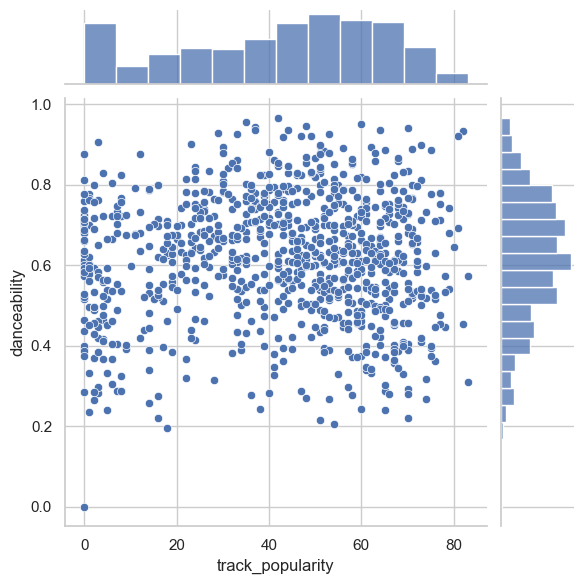

In [61]:
# danceability and popularity 
sns.jointplot(data=spotify80, x= "track_popularity", y= "danceability")

In [77]:
#jointplot for each feature
def jointplot_features(df):
    jointplot = sns.jointplot(data=df, x= "track_popularity", y= "danceability", color='red')  
    plt.xlabel("Popularity")
    plt.ylabel("Danceability")
    jointplot = sns.jointplot(data=df, x= "track_popularity", y= "energy", color='blue')
    plt.xlabel("Popularity")
    plt.ylabel("Danceability")
    jointplot = sns.jointplot(data=df, x= "track_popularity", y= "valence", color='green')
    plt.xlabel("Popularity")
    plt.ylabel("Danceability")
    jointplot.figure.savefig(f"../images/jointplot.jpg", dpi=1000)
    #plt.clf()
    #return popularity

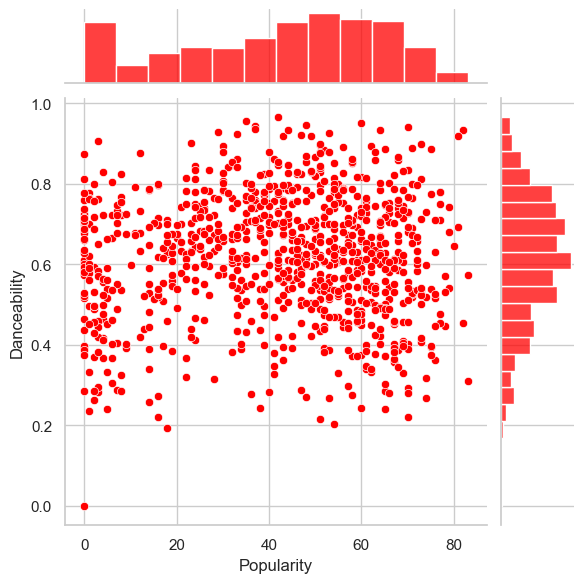

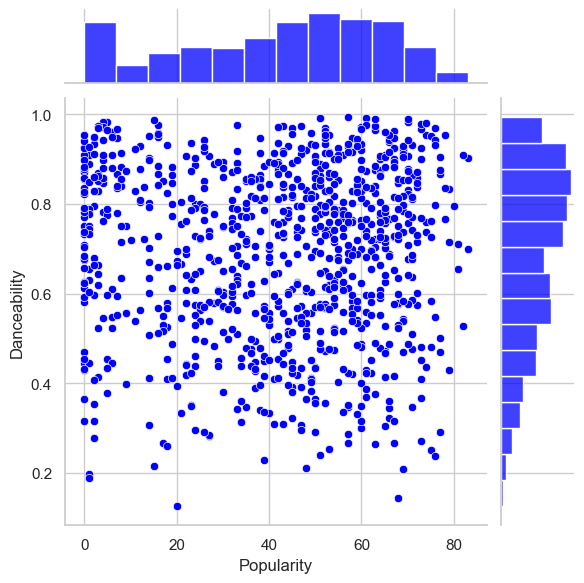

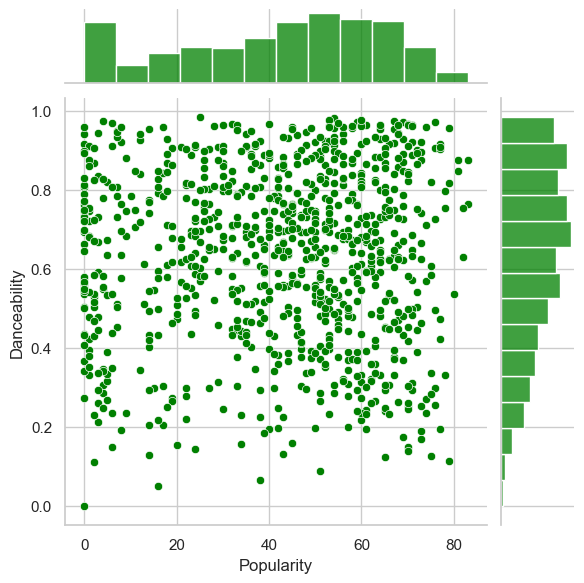

In [78]:
jointplot_features(spotify80)

In [79]:
#lineplot for each feature

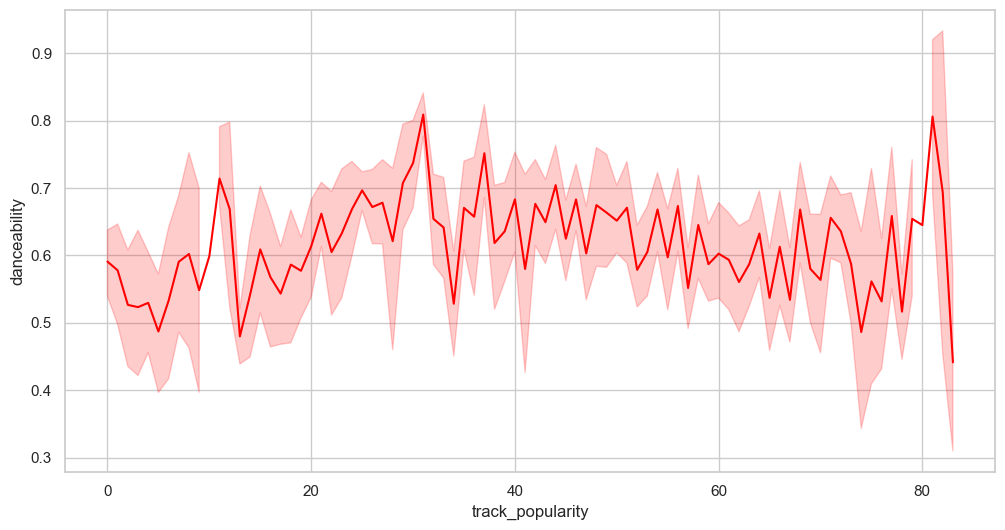

In [65]:
#danceability
sns.lineplot(data=spotify80, x= "track_popularity", y= "danceability", color ='red');

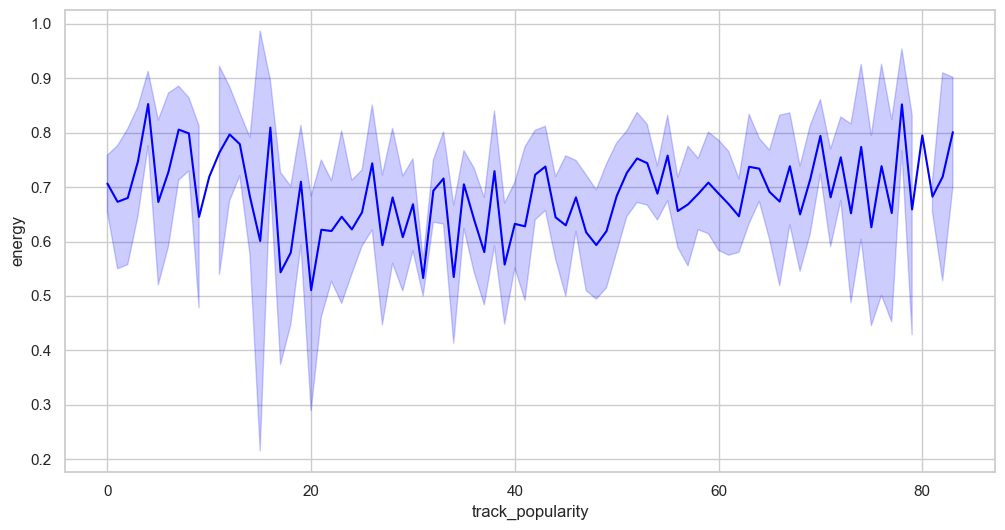

In [66]:
#energy
sns.lineplot(data=spotify80, x= "track_popularity", y= "energy", color='blue');

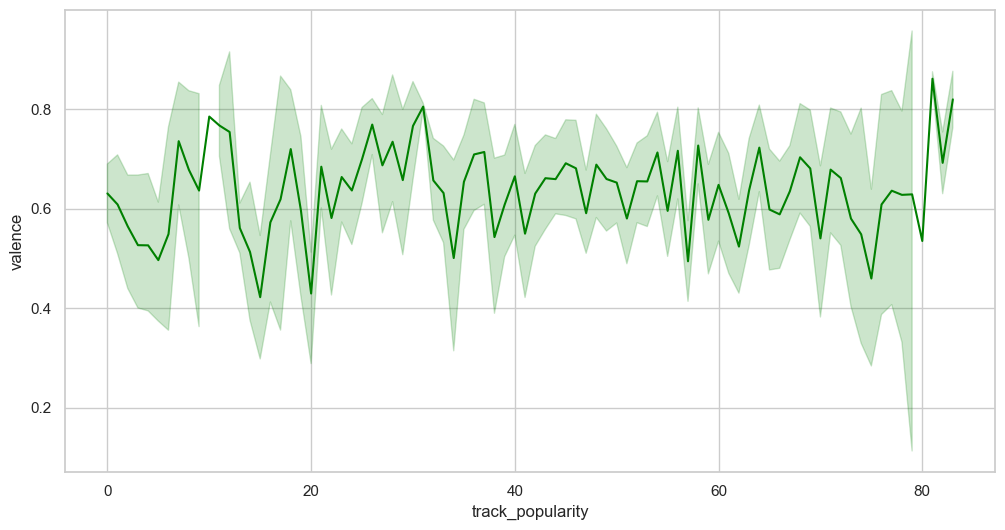

In [67]:
#valence
sns.lineplot(data=spotify80, x= "track_popularity", y= "valence", color = 'green');

In [ ]:
# POPULARE FEATURES THROUGHOUT DECADES

In [68]:
# danceability throughout decades

In [69]:
spotify_popular = pd.concat([spotify60,spotify70,spotify80,spotify90,spotify00,spotify10], ignore_index=True)

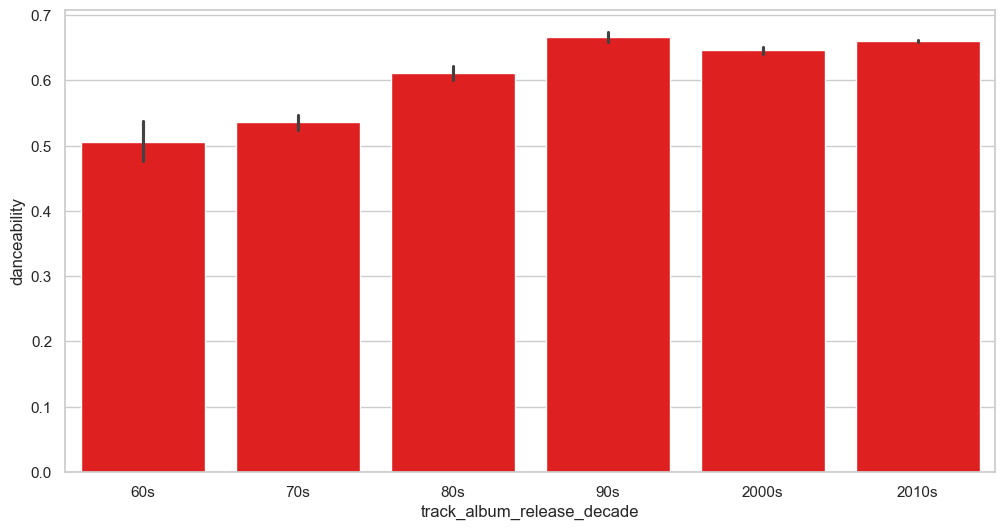

In [71]:
sns.barplot(x="track_album_release_decade", y="danceability", data=spotify_popular, order = ['60s','70s','80s','90s','2000s','2010s'], color = 'red');

In [90]:
# energy throughout decades

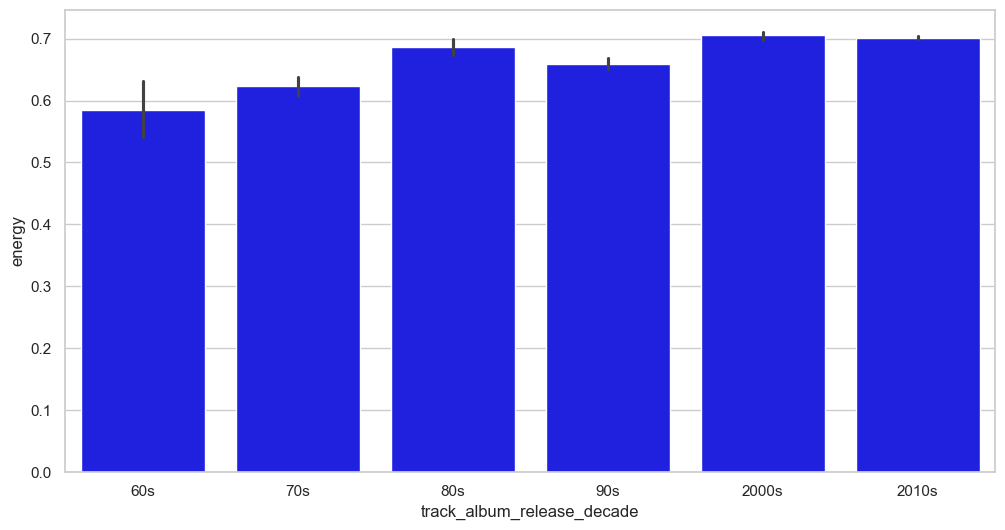

In [72]:
sns.barplot(x="track_album_release_decade", y="energy", data=spotify_popular, order = ['60s','70s','80s','90s','2000s','2010s'], color='blue');

In [ ]:
# valence throughout decades

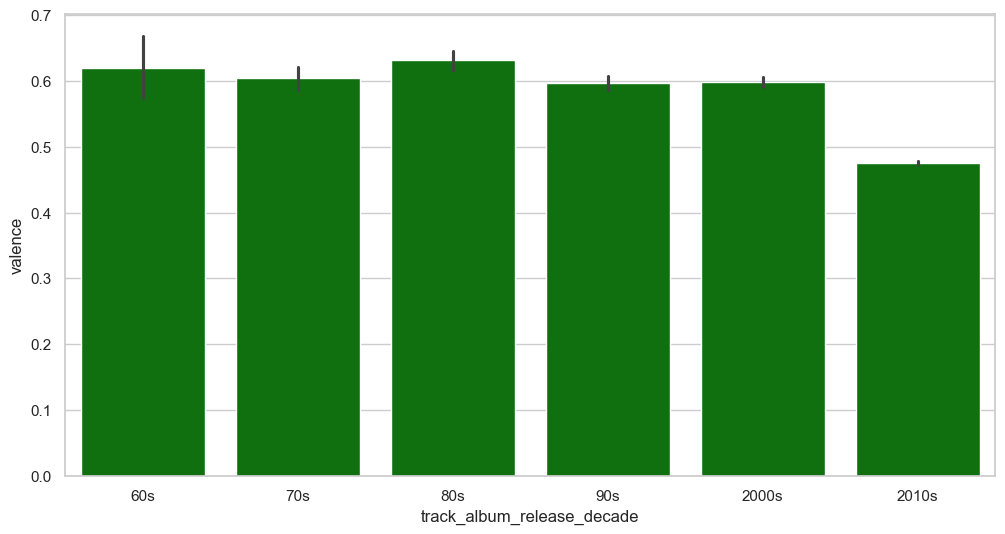

In [73]:
sns.barplot(x="track_album_release_decade", y="valence", data=spotify_popular, order = ['60s','70s','80s','90s','2000s','2010s'], color='green');